In [33]:
import torch
import numpy as np
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [8]:
## Load the dataset using pandas
data = pd.read_csv("diabetes.csv")

In [9]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive


In [10]:
print(data.columns)
print(data.shape)

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Age', 'Class'],
      dtype='object')
(768, 8)


In [12]:
## For x: Extract out the dataset from all the rows (all samples) and all the columns except last column
## For y: Last column which is the label
## Convert both to numpy using the .values method

x = data.iloc[:,0:-1].values
y_string = list(data.iloc[:,-1].values)

In [16]:
len(y_string)

768

In [18]:
## Lets look at some samples from the data
y_int = []
for s in y_string:
    if s=='positive':
        y_int.append(1)
    else:
        y_int.append(0)
    
# y_int  

In [21]:
## Now convert it to numpy array
y = np.array(y_int,dtype='float64')
# y

In [24]:
## Feature Normalization - all feature should have same range of values (-1,1)

sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.20401277,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.68442195, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
        -1.10325546, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.73518964, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.24020459,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.20212881, -0.87137393]])

In [25]:
## Now we convert array to pytorch tensors
x = torch.tensor(x)
y = torch.tensor(y)

In [26]:
x.shape

torch.Size([768, 7])

In [27]:
y.shape

torch.Size([768])

In [28]:
## we need to add dimension 1 to y (768,1)
y = torch.tensor(y).unsqueeze(1)
y.shape

/var/folders/45/q4cs2tvs2nx8m5pblm6hgzvr0000gp/T/ipykernel_74299/3316878353.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y).unsqueeze(1)


torch.Size([768, 1])

In [29]:
class Dataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return len(self.x)
        

In [31]:
dataset = Dataset(x,y)

In [32]:
len(dataset)

768

In [35]:
## Load the data to your dataloader for batch processing and shuffling

train_loader = torch.utils.data.DataLoader(dataset=dataset,batch_size=32,shuffle=True)

In [37]:
## Lets look at the data loader

print("There is {} batches in the dataset".format(len(train_loader)))

for (x,y) in train_loader:
    print("For one iteration (batch), there is:")
    print("Data: {}".format(x.shape))
    print("Labels: {}".format(y.shape))

There is 24 batches in the dataset
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])
For one iteration (batch), there is:
Data: torch.Size([

In [38]:
768/24

32.0

In [40]:
## Building your neural network
class Model(nn.Module):
    def __init__(self,input_features,output_features):
        super(Model,self).__init__()
        self.fc1 = nn.Linear(input_features,5)
        self.fc2 = nn.Linear(5,4)
        self.fc3 = nn.Linear(4,3)
        self.fc4 = nn.Linear(3,output_features)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out
        

In [41]:
## Create the network
net = Model(7,1)
## In binary cross entropy : the input and output should have the same shape
# size_average = True --> The losses are averaged over observations for each mini batch
criterion = torch.nn.BCELoss(size_average = True)
## we will use SGD with momentum with learning rate of 0.1
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)


/Users/anshumanbhadauria/opt/anaconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [42]:
## Training the network

epochs = 200
for epoch in range(200):
    for inputs,labels in train_loader:
        inputs = inputs.float()
        labels = labels.float()
        # Forward proporgation
        outputs = net(inputs)
        # Loss calculation
        loss = criterion(outputs, labels)
        # Clear the gradient buffer (w <-- w - lr*gradient )
        optimizer.zero_grad()
        # Backpropogation
        loss.backward()
        # Update weights
        optimizer.step()
        
    ## Accuracy Calculation
    output = (outputs>0.5).float()
    ##  (output == labels).sum()/output.shape[0]
    accuracy = (output == labels).float().mean()
    ## Print Statistics
    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,epochs,loss,accuracy))



Epoch 1/200, Loss: 0.651, Accuracy: 0.625
Epoch 2/200, Loss: 0.447, Accuracy: 0.844
Epoch 3/200, Loss: 0.553, Accuracy: 0.688
Epoch 4/200, Loss: 0.628, Accuracy: 0.750
Epoch 5/200, Loss: 0.486, Accuracy: 0.844
Epoch 6/200, Loss: 0.575, Accuracy: 0.719
Epoch 7/200, Loss: 0.337, Accuracy: 0.844
Epoch 8/200, Loss: 0.406, Accuracy: 0.812
Epoch 9/200, Loss: 0.368, Accuracy: 0.875
Epoch 10/200, Loss: 0.421, Accuracy: 0.750
Epoch 11/200, Loss: 0.357, Accuracy: 0.844
Epoch 12/200, Loss: 0.449, Accuracy: 0.812
Epoch 13/200, Loss: 0.658, Accuracy: 0.625
Epoch 14/200, Loss: 0.381, Accuracy: 0.844
Epoch 15/200, Loss: 0.476, Accuracy: 0.781
Epoch 16/200, Loss: 0.558, Accuracy: 0.719
Epoch 17/200, Loss: 0.446, Accuracy: 0.781
Epoch 18/200, Loss: 0.490, Accuracy: 0.812
Epoch 19/200, Loss: 0.421, Accuracy: 0.812
Epoch 20/200, Loss: 0.507, Accuracy: 0.688
Epoch 21/200, Loss: 0.435, Accuracy: 0.781
Epoch 22/200, Loss: 0.514, Accuracy: 0.719
Epoch 23/200, Loss: 0.496, Accuracy: 0.781
Epoch 24/200, Loss: 

Epoch 190/200, Loss: 0.397, Accuracy: 0.844
Epoch 191/200, Loss: 0.540, Accuracy: 0.781
Epoch 192/200, Loss: 0.422, Accuracy: 0.781
Epoch 193/200, Loss: 0.582, Accuracy: 0.750
Epoch 194/200, Loss: 0.491, Accuracy: 0.688
Epoch 195/200, Loss: 0.613, Accuracy: 0.688
Epoch 196/200, Loss: 0.470, Accuracy: 0.719
Epoch 197/200, Loss: 0.385, Accuracy: 0.812
Epoch 198/200, Loss: 0.415, Accuracy: 0.812
Epoch 199/200, Loss: 0.500, Accuracy: 0.719
Epoch 200/200, Loss: 0.337, Accuracy: 0.906


In [1]:
## Visualizing the learning process of neural networks


import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets


/Users/anshumanbhadauria/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
x, y = sklearn.datasets.make_moons(200,noise=0.20)

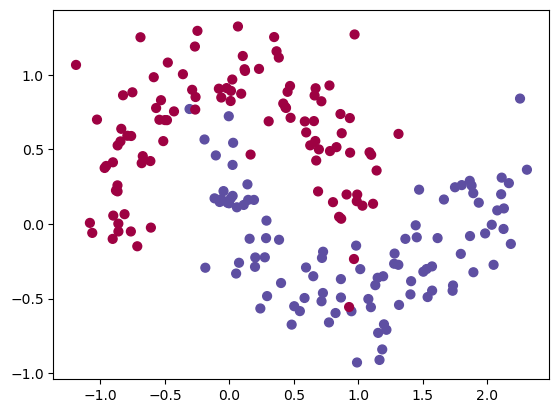

In [3]:
## Lets plot the data

plt.scatter(x[:,0],x[:,1],s=40, c=y,cmap=plt.cm.Spectral)
plt.show()

## data Cannnot be seperated by straight lines

In [4]:
## Convert dataset into pytorch tensors

x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [5]:
## Start building your neural network

In [6]:
class FeedForward(torch.nn.Module):
    def __init__(self,input_neurons,hidden_neurons,output_neurons):
        super(FeedForward,self).__init__()
        self.hidden = nn.Linear(input_neurons,hidden_neurons)
        self.out = nn.Linear(hidden_neurons,output_neurons)
        
    def forward(self,x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x
    


In [7]:
network = FeedForward(input_neurons=2,hidden_neurons=50,output_neurons=2)
optimizer = torch.optim.SGD(network.parameters(),lr = 0.02)
loss_function = torch.nn.CrossEntropyLoss()



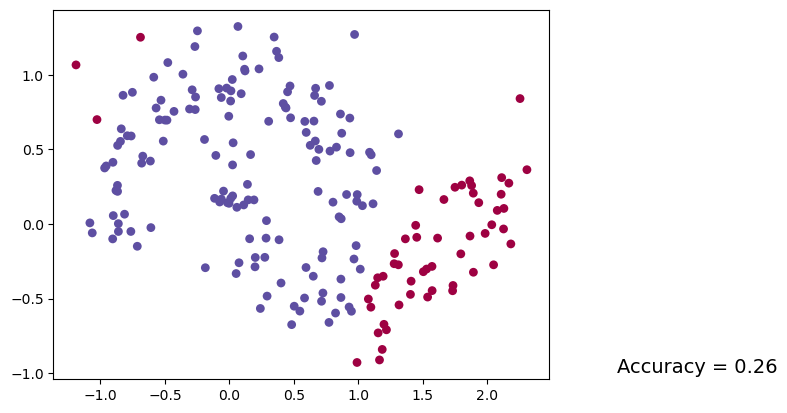

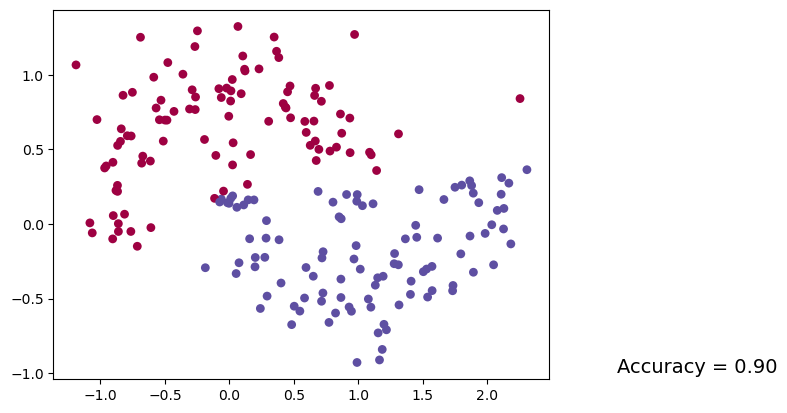

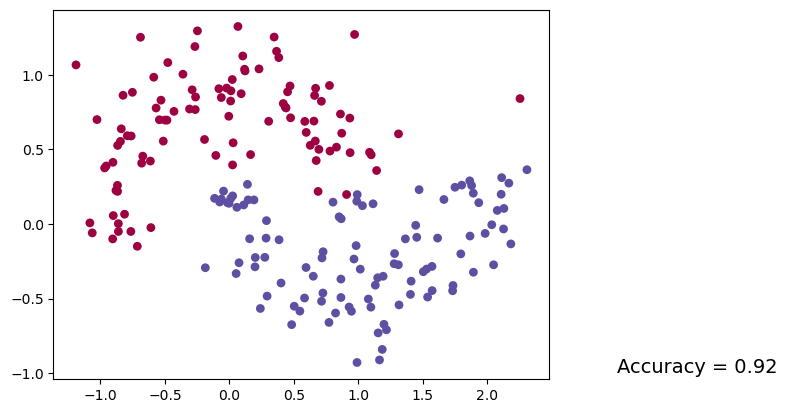

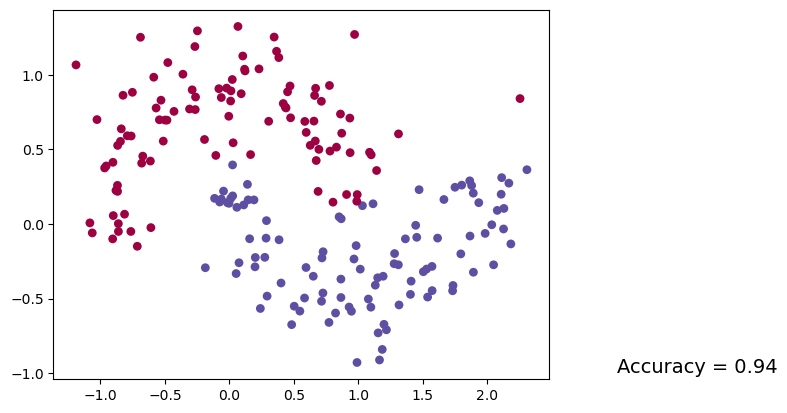

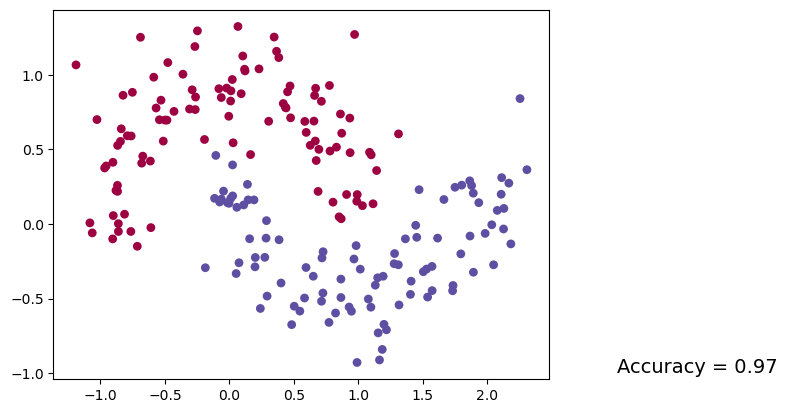

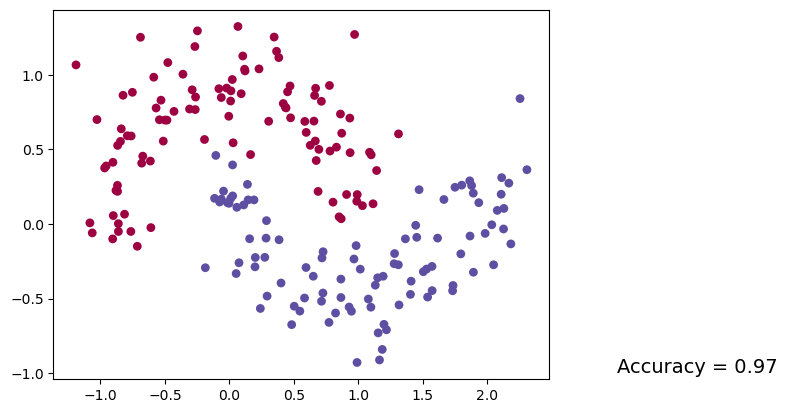

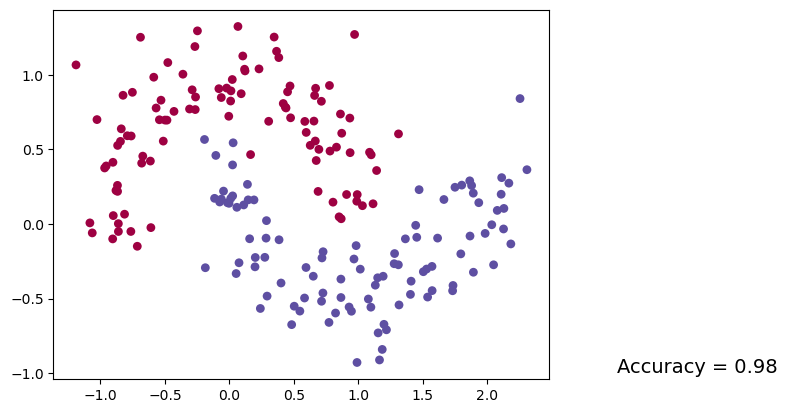

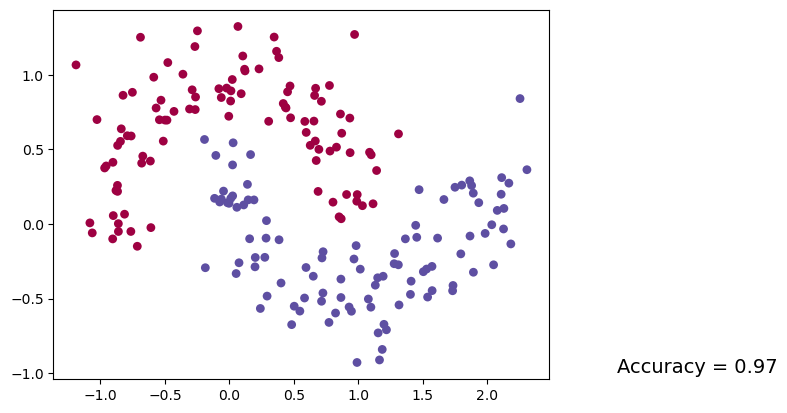

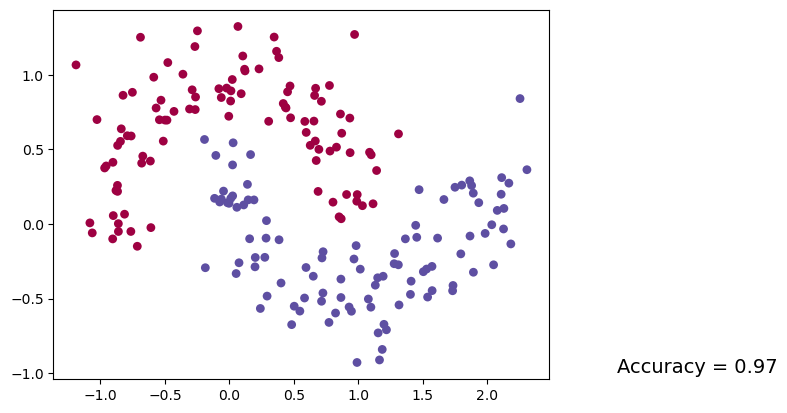

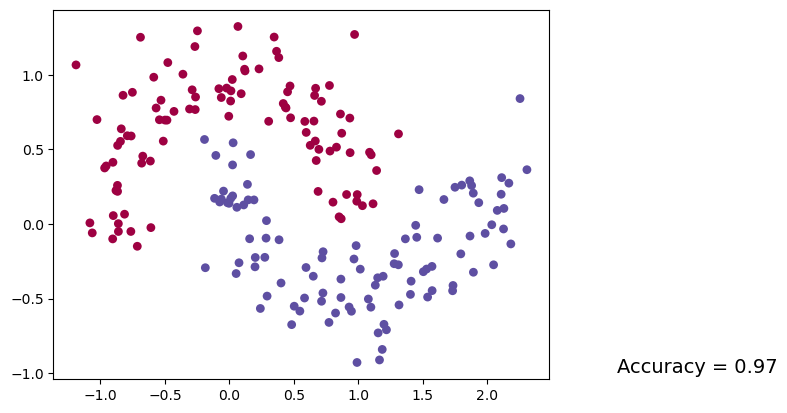

In [9]:
plt.ion()
for epoch in range(10000):
    out = network(x)
    loss = loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        ## Show the learning process up until now
        max_value, prediction = torch.max(out,1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],s=40, c=predicted_y,cmap=plt.cm.Spectral,lw=0)
        accuracy = (predicted_y == target_y).sum()/target_y.size
        plt.text(3,-1,'Accuracy = {:.2f}'.format(accuracy),fontdict = {'size':14})
        plt.pause(0.1)

        
plt.ioff()
plt.show()
        

In [14]:
## Learning OOPS Concepts

## Classes with objects
class Dog:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def bark(self):
        print(f"{self.name} is barking!")
    def introduce(self):
        print(f"I'm {self.name}, a {self.age}-year-old dog.")
        
## creating instance of the class
dog1 = Dog("Buddy",3)
dog2 = Dog("Rambo",5)

## Using instance methods and attributes

dog1.introduce()


I'm Buddy, a 3-year-old dog.


In [20]:
## Encapsulation

class Student:
    def __init__(self,name,age):
        self.name = name
        self.__age = age ## Private attribute
        
    def get_age(self):
        return self.__age
    
    def set_age(self,age):
        if age > 0:
            self.__age = age
            

student = Student("Alice",20)
print(student.get_age())
student.set_age(22)
print(student.get_age())

20
22


In [28]:
## Inheritence
## Inheritance allows you to create a new class that inherits attributes and methods from an existing class. 
#It promotes code reuse and specialization.

class Animal:
    def __init__(self,species):
        self.species = species
    
    def make_sound(self):
        pass ## Abstract method

class Dog(Animal):
    def __init__(self,name,breed):
        super().__init__("Dog")
        self.name = name
        self.breed = breed
        
    def make_sound(self):
        print("Woof!")
        
        
dog = Dog("Buddy","Golden Retriever")
print(dog.species)
dog.make_sound()

Dog
Woof!


In [31]:
## Polymorphism - Polymorphism enables objects of different classes to be treated as instances of a 
#common superclass, allowing for flexible and dynamic behavior.


class Shape:
    def area(self):
        pass
    
class Circle(Shape):
    def __init__(self,radius):
        self.radius = radius
        
    def area(self):
        return 3.14 * self.radius ** 2
    
class Square(Shape):
    def __init__(self,side):
        self.side = side
        
    def area(self):
        return self.side ** 2
    
shapes = [Circle(5), Square(4)]

for shape in shapes:
    print(f"Area: {shape.area()}")
    

Area: 78.5
Area: 16


In [32]:
## Abstraction

from abc import ABC, abstractmethod

class Shape(ABC):
    @abstractmethod
    def area(self):
        pass
    
class Circle(Shape):
    def __init__(self,radius):
        self.radius = radius
        
    def area(self):
        return 3.14159 * self.radius ** 2
    
circle = Circle(7)
print(circle.area())

153.93791


## Building neural networks using numpy

In [35]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

In [36]:
import matplotlib.pyplot as plt
import sklearn.datasets


In [47]:
X,y = sklearn.datasets.make_moons(200,noise=0.10)

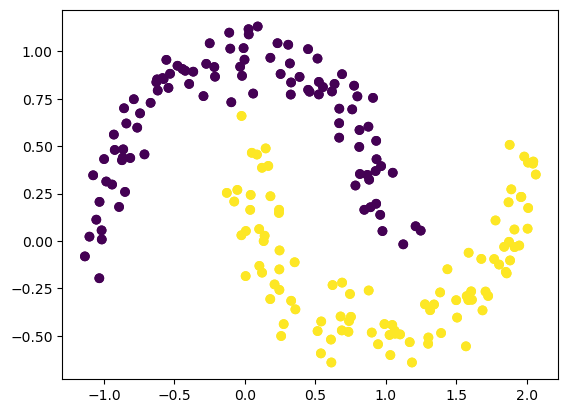

In [50]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [51]:
X.shape

(200, 2)

In [54]:
input_neurons = 2
output_neurons = 2
samples = len(X)
learning_rate = 0.001
lamba = 0.01

In [55]:
model_dic = {'W1': W1, 'b1':b1, 'W2':W2, 'b2':b2}

NameError: name 'W1' is not defined

In [56]:
def retrieve(model_dic):
    W1 = model_dic['W1']
    b1 = model_dic['b1']
    W2 = model_dic['W2']
    b2 = model_dic['b2']
    return W1,b1,W2,b2

In [57]:
def forward(x,model_dict):
    W1,b1,W2,b2 = retrieve(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores/np.sum(exp_scores,dim =1, keepdims=True)
    return softmax
    
    
    

In [64]:
def loss(softmax,y):
    W1, b1, W2, b2 = retrieve(model_dict)
    softmax = np.random.randn(200,2)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(predicted)
    softmax_loss = np.sum(log_prob)
    reg_loss = lambda_reg /2*(np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss = softmax_loss + reg_loss
    return float(loss / y.shape[0])
    
    

## Steps to follow for building pytorch model


In [68]:
# Step 1
# Import libraries
# Import the necessary libraries, including PyTorch, torch modules, and any other libraries needed for data processing.

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
# Step 2
# Define your Neural Network:
# Define your neural network architecture by creating a custom class that inherits from nn.Module. 
# Implement the __init__ method to define the layers and connections, 
# and the forward method to define the forward pass through the network.

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MyModel()



In [ ]:
## Step 3: Choose a Loss Function and Optimizer:
## Select an appropriate loss function based on your problem (e.g., mean squared error for regression, cross-entropy for classification). Choose an optimizer (e.g., SGD, Adam) 
## to update the model's parameters during training.

criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
## Step 4: Prepare your data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


In [ ]:
## Step 5: Training Loop

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}")


In [ ]:
## Step 6: Model Evaluation --> After training, evaluate your model's performance on a separate test dataset to assess its generalization ability.
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.2%}")




In [ ]:
## Save and Load Models (Optional):

torch.save(model.state_dict(), "my_model.pth")

# Load the model
model.load_state_dict(torch.load("my_model.pth"))


## HandDigit Recognition

In [74]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [72]:
input_size = 784  # Number of input neurons
hidden_size = 400 # number of hidden neurons
out_size = 10 # number of classes (0-9)
epochs = 10 # how many times we pass our entire dataset into our network
batch_size = 100 # input size of the data during one iteration
learning_rate = 0.01 # how fast we are learning

In [73]:
train_dataset = datasets.MNIST(root = './data',train=True,transform = transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root = './data',train=False,transform = transforms.ToTensor())


100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 10047215.97it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 31496540.26it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 2648518.67it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|█████████████████████████████████| 4542/4542 [00:00<00:00, 19419499.25it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [75]:
## Make data iterable by loading it to a loader.Shuffle the training data to make it indenpendent of orders

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

In [78]:
class Net(nn.Module):
    def __init__(self,input_size,hidden_size,out_size):
        super(Net,self).__init__() # To inherit from nn module
        self.fc1 = nn.Linear(input_size,hidden_size) #first layer
        self.relu = nn.ReLU()                        # First layer activation
        self.fc2 = nn.Linear(hidden_size,hidden_size) # Second Layer
        self.fc3 = nn.Linear(hidden_size,out_size) # Final layer 
        
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
        

In [124]:


class Net(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()                    
        self.fc1 = nn.Linear(input_size, hidden_size)    #First Layer                           
        self.fc2 = nn.Linear(hidden_size, hidden_size)      #Second Layer Activation
        self.fc3 = nn.Linear(hidden_size, out_size)
        self.relu = nn.ReLU()
        self.init_weights()
        
    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):                          
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out



In [82]:
## create an object of the class , which represents our network

net = Net(input_size,hidden_size,out_size)
CUDA = torch.cuda.is_available()
if CUDA:
    net = net.cuda()
    
## The loss function. The cross entropy loss comes along with softmax, therefore, no need to specify softmax as well

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr = learning_rate)



In [86]:
## what net.parameter has ?
net.parameters

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=10, bias=True)
)>

In [90]:
## Training the network
## Visualize the train loader

for i, (images,labels) in enumerate(train_loader):
    print(images.size())
    images = images.view(-1,784)  ## reshape the image to 
    print(images.size())

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([100, 1, 28, 28])
torch.Size([100, 784])
torch.Size([

In [125]:
#Train the network
for epoch in range(epochs):
    correct_train = 0
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):   
        #Flatten the image from size (batch,1,28,28) --> (100,1,28,28) where 1 represents the number of channels (grayscale-->1),
        # to size (100,784) and wrap it in a variable
        images = images.view(-1, 28*28)    
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
            
        outputs = net(images)       
        _, predicted = torch.max(outputs.data, 1)                                              
        correct_train += (predicted == labels).sum() 
        loss = criterion(outputs, labels)                 # Difference between the actual and predicted (loss function)
        running_loss += loss.item()
        # Clear the param_grad in param = param - lr*param_grad , so it wont be accumulated
        optimizer.zero_grad() 
        loss.backward()                                   # Backpropagation
        optimizer.step()                                  # Update the weights
        
    print('Epoch [{}/{}], Training Loss: {:.3f}, Training Accuracy: {:.3f}%'.format
          (epoch+1, epochs, running_loss/len(train_loader), (100*correct_train.double()/len(train_dataset))))
print("DONE TRAINING!")



Epoch [1/10], Training Loss: 0.034, Training Accuracy: 99.370%
Epoch [2/10], Training Loss: 0.034, Training Accuracy: 99.280%
Epoch [3/10], Training Loss: 0.040, Training Accuracy: 99.250%
Epoch [4/10], Training Loss: 0.035, Training Accuracy: 99.317%
Epoch [5/10], Training Loss: 0.033, Training Accuracy: 99.355%
Epoch [6/10], Training Loss: 0.037, Training Accuracy: 99.265%
Epoch [7/10], Training Loss: 0.042, Training Accuracy: 99.228%
Epoch [8/10], Training Loss: 0.038, Training Accuracy: 99.203%
Epoch [9/10], Training Loss: 0.027, Training Accuracy: 99.408%
Epoch [10/10], Training Loss: 0.027, Training Accuracy: 99.472%
DONE TRAINING!


In [126]:
with torch.no_grad():
    correct = 0
    for images, labels in test_loader:
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
        images = images.view(-1, 28*28)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / len(test_dataset)))


Accuracy of the network on the 10000 test images: 97.36 %


In [123]:
correct

9746